In [1]:
from cvm.utils import UnitConvert as uc
from matplotlib import pyplot as plt

from pprint import pprint

from cvm.A1 import Tetrahedron, TetraOctahedron
from cvm.sample import Sample
from cvm.vibration import ClusterVibration

from cvm.utils import parse_formula, mixed_atomic_weight, parse_input_set, UnitConvert, cvm_context
import numpy as np
import pandas as pd

In [2]:
tmp = pd.read_csv('AlMg/cluster.csv')
tmp

,lattice,host,Al4Mg2,Al5Mg1,Al6,Mg4,Al1Mg3,Al2Mg2,Al3Mg1,Al4
0,7.0,-485.837607,170.104016,85.052267,-0.000019,340.227359,255.165104,170.106997,85.052177,-0.000023
1,7.1,-485.845934,170.085276,85.042833,-0.000017,340.190412,255.137168,170.088250,85.042752,-0.000020
2,7.2,-485.852458,170.067542,85.033914,-0.000015,340.155286,255.110667,170.070497,85.033838,-0.000018
3,7.3,-485.857387,170.050758,85.025476,-0.000014,340.121903,255.085532,170.053683,85.025404,-0.000016
4,7.4,-485.860905,170.034717,85.017419,-0.000012,340.089881,255.061465,170.037603,85.017346,-0.000015
5,7.5,-485.863175,170.019403,85.009722,-0.000011,340.059188,255.038443,170.022242,85.009655,-0.000014
6,7.6,-485.864353,170.005040,85.002511,-0.000011,340.030274,255.016806,170.007827,85.002444,-0.000013
7,7.7,-485.864583,169.991721,84.995828,-0.000010,340.003346,254.996704,169.994456,84.995762,-0.000012
8,7.8,-485.863991,169.979344,84.989622,-0.000010,339.978217,254.977988,169.982024,84.989555,-0.000011
9,7.9,-485.862687,169.967733,84.983800,-0.000009,339.954536,254.960389,169.970352,84.983733,-0.000011


In [3]:
inp = parse_input_set('AlMg')

In [4]:
inp['series'][0]['energies']

,host,Al4Mg2,Al5Mg1,Al6,Mg4,Al1Mg3,Al2Mg2,Al3Mg1,Al4
lattice,,,,,,,,,
7.0,-485.837607,170.104016,85.052267,-0.000019,340.227359,255.165104,170.106997,85.052177,-0.000023
7.1,-485.845934,170.085276,85.042833,-0.000017,340.190412,255.137168,170.088250,85.042752,-0.000020
7.2,-485.852458,170.067542,85.033914,-0.000015,340.155286,255.110667,170.070497,85.033838,-0.000018
7.3,-485.857387,170.050758,85.025476,-0.000014,340.121903,255.085532,170.053683,85.025404,-0.000016
7.4,-485.860905,170.034717,85.017419,-0.000012,340.089881,255.061465,170.037603,85.017346,-0.000015
7.5,-485.863175,170.019403,85.009722,-0.000011,340.059188,255.038443,170.022242,85.009655,-0.000014
7.6,-485.864353,170.005040,85.002511,-0.000011,340.030274,255.016806,170.007827,85.002444,-0.000013
7.7,-485.864583,169.991721,84.995828,-0.000010,340.003346,254.996704,169.994456,84.995762,-0.000012
7.8,-485.863991,169.979344,84.989622,-0.000010,339.978217,254.977988,169.982024,84.989555,-0.000011


In [5]:
tetra = Tetrahedron(**inp)

with cvm_context(simple_print='True'):
    print(tetra)

KeyError: 'Al'

In [5]:
sample = tetra.tag_800k
sample

tag_800k-<$T_\mathrm{FD}=800$K>-<skip: False>:
  | 
  |-Normalizer:
  |   |-Al2Mg2: [[1, 11, 2]]
  | 
  |-Al4Mg2:
  |   |-c1: 0.179927,  c2: 0.179885,  lambda: 1.141575
  |   |-r0: 3.099911,  x0: 0.029049
  |   |-Gruneisen constant: 1.769391
  |   |-Equilibrium lattice constant: 7.932290 a.u.
  |   |-Bulk Modulus: 43.378387 Kbar
  |   |-Debye temperature: 94.523510 K
  | 
  |-Al5Mg1:
  |   |-c1: 0.180260,  c2: 0.180207,  lambda: 1.186364
  |   |-r0: 3.050024,  x0: 0.026825
  |   |-Gruneisen constant: 1.809219
  |   |-Equilibrium lattice constant: 7.804638 a.u.
  |   |-Bulk Modulus: 47.700451 Kbar
  |   |-Debye temperature: 97.489963 K
  | 
  |-Al6:
  |   |-c1: 0.182964,  c2: 0.182910,  lambda: 1.232519
  |   |-r0: 2.999432,  x0: 0.024801
  |   |-Gruneisen constant: 1.848428
  |   |-Equilibrium lattice constant: 7.675180 a.u.
  |   |-Bulk Modulus: 53.138042 Kbar
  |   |-Debye temperature: 101.192691 K
  | 
  |-Mg4:
  |   |-c1: 0.198398,  c2: 0.198453,  lambda: 0.973855
  |   |-r0: 3.292

In [8]:
vib.r_0

2.9994281681805286

In [9]:
vib = sample.Mg4
vib

Mg4:
  |-c1: 0.198398,  c2: 0.198453,  lambda: 0.973855
  |-r0: 3.292903,  x0: 0.040486
  |-Gruneisen constant: 1.603404
  |-Equilibrium lattice constant: 8.426133 a.u.
  |-Bulk Modulus: 32.785839 Kbar
  |-Debye temperature: 87.749582 K

In [7]:
mixed_atomic_weight('Mg4')

(24.305, 4)

In [8]:
vib.bulk_modulus

32.78583901873131

In [9]:
tmp = lambda _r: vib(700, r=_r, vibration=True)

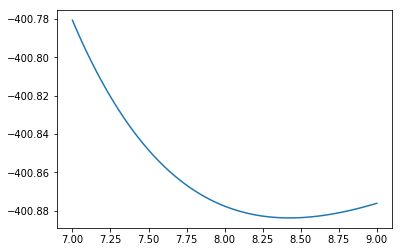

In [12]:
x = np.linspace(vib._xs[0], vib._xs[-1], 100)
y = [vib.morse_potential(x_) + vib._shift for x_ in x]

plt.plot(uc.ad2lc(x), y)

In [13]:
from scipy.optimize import curve_fit, minimize_scalar

poly_min = minimize_scalar(
#     lambda _r: vib(800, r=_r, vibration=True),
    tmp,
    bounds=(vib._xs[0], vib._xs[-1]),
    method='bounded')

poly_min

     fun: -36256.71458181205
 message: 'Solution found.'
    nfev: 24
  status: 0
 success: True
       x: 3.126366628494514

In [14]:
uc.ad2lc(poly_min.x)

7.999989921367312

In [8]:
uc.ad2lc(3.126366628494514)

7.999989921367312

In [8]:
def patch(_, r0):

    _1st = -0.081 + (-0.00365 * (r0 - 7.85) / 0.1)
    
    return {'pair1': -0}

In [9]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


def percent(x, pos=0):
    return u'{:3.1f}'.format(100 * x)


def process(meta, *results, experiment=None):    

    def percent(x, pos=0):
        return u'{:3.1f}'.format(100 * x)
    
    fig, ax = plt.subplots(figsize=(8, 4.5), dpi=150)  # 800 * 500
    plt.subplots_adjust(top=0.97, bottom=0.14, left=0.12, right=0.97)

    # draw experiment
    if experiment is not None:
        y_exp = experiment['temperature']
        x_exp = experiment['concentration']
        # ax.annotate('1200$K$', (0.005, 410), fontsize=13)
        ax.plot(
            x_exp, y_exp, 'x--', mew=3, mfc='w', ms=6, lw=1.5, label='Experiment')

    # draw results
    line_type = ['o-', 'o--', 'o:']
    for i, res in enumerate(results):
        # plt.xlim(xmin=0.5, xmax=12.5)
        # plt.axhline(y=0, color='k', ls='-', lw=1.0)
        # label[i] = 'int= ' + '{:07.4}'.format(Results[i]['1st_int'])
        ax.plot(
            res['c'],
            res['temp'],
            # 'o-',
            line_type[i],
            color='darkorange',
            ms=4,
            lw=1.5,
            label=res['label'])

    # set formater
    ax.xaxis.set_major_formatter(FuncFormatter(percent))
    ax.set_xlim(0, 0.122)

    # for preview
    ax.grid(axis='y')
    ax.tick_params(labelsize=14.5)
    ax.set_ylabel(r'Temperature, $T$/K', size=16)
    ax.set_xlabel(
        r'Concentration of ' + meta['impurity'].capitalize() +
        r', $c$/at$\%$',
        size=16)
#     ax.annotate(
#         r'(b)CVMTO10, with thermal vibration effect', (0.003, 1830), size=15)
#     ax.annotate(r'$T_\mathrm{FD}=1600$K', (0.004, 1630), size=17)
    ax.legend(loc='lower right', markerscale=1.2, fontsize=15)
    fig_name = "_".join(
        (meta['prefix'], meta['host'], meta['impurity'],
         meta['suffix'])).lstrip('_')
#     plt.savefig(fig_name, dpi=600)  # 300 dpi
    plt.show()



In [10]:
tmp.tag_800k(400, r=7.8, convert_r=True)

interaction_energy(pair1=-0.004269050928996876, pair2=-0.0030228211762732826, triple=0.00021021593420300633, tetra=7.163475675042719e-05)

In [11]:
tmp['$T_\mathrm{FD}=800$K'](400, r=7.8, convert_r=True, vibration=False)

interaction_energy(pair1=-0.002003357447392773, pair2=-0.003095598891377449, triple=0.000258600884990301, tetra=0.0002537990876589902)

In [12]:
tmp['$T_\mathrm{FD}=800$K'](400)

interaction_energy(pair1=-0.006876104642287828, pair2=-0.0026185859023826197, triple=-0.0008483413548674434, tetra=-0.008781430835369974)

In [13]:
for status in tmp(sample_paras=dict(energy_patch=patch, vibration=False), verbose=False):
    print('1st: %.5f eV' % (status.int_energy.pair1))
    print('2nd: %.5f eV' % (status.int_energy.pair2))
    print('triple: %.5f eV' % (status.int_energy.triple))
    print('tetra: %.5f eV' % (status.int_energy.tetra))
    print('T=%6.3f' % status.temperature, 'Concentration=%6.4f%%' % (status.concentration * 100), 'Counts=%s' % status.num_of_ite, '\n')

1st: -0.00263 eV
2nd: -0.00357 eV
triple: 0.00025 eV
tetra: 0.00027 eV
T=400.000 Concentration=50.6424% Counts=133 

1st: -0.00263 eV
2nd: -0.00357 eV
triple: 0.00025 eV
tetra: 0.00027 eV
T=431.579 Concentration=50.5888% Counts=66 

1st: -0.00263 eV
2nd: -0.00357 eV
triple: 0.00025 eV
tetra: 0.00027 eV
T=463.158 Concentration=50.5435% Counts=64 

1st: -0.00263 eV
2nd: -0.00357 eV
triple: 0.00025 eV
tetra: 0.00027 eV
T=494.737 Concentration=50.5046% Counts=63 

1st: -0.00263 eV
2nd: -0.00357 eV
triple: 0.00025 eV
tetra: 0.00027 eV
T=526.316 Concentration=50.4710% Counts=61 

1st: -0.00263 eV
2nd: -0.00357 eV
triple: 0.00025 eV
tetra: 0.00027 eV
T=557.895 Concentration=50.4415% Counts=60 

1st: -0.00263 eV
2nd: -0.00357 eV
triple: 0.00025 eV
tetra: 0.00027 eV
T=589.474 Concentration=50.4155% Counts=58 

1st: -0.00263 eV
2nd: -0.00357 eV
triple: 0.00025 eV
tetra: 0.00027 eV
T=621.053 Concentration=50.3924% Counts=57 

1st: -0.00263 eV
2nd: -0.00357 eV
triple: 0.00025 eV
tetra: 0.00027 eV


In [14]:
tmp.results.tag_800k

,temperature,concentration,num_of_ite,pair1,pair2,triple,tetra
0,400.0,0.016917,1,-0.002424,-0.003454,0.000253,0.000269
1,400.0,0.026736,2,-0.002427,-0.003456,0.000253,0.000269
2,400.0,0.039789,3,-0.002431,-0.003458,0.000253,0.000269
3,400.0,0.056160,4,-0.002436,-0.003461,0.000253,0.000269
4,400.0,0.075661,5,-0.002443,-0.003465,0.000253,0.000269
5,400.0,0.097857,6,-0.002452,-0.003470,0.000253,0.000269
6,400.0,0.122139,7,-0.002461,-0.003475,0.000253,0.000269
7,400.0,0.147805,8,-0.002471,-0.003481,0.000253,0.000269
8,400.0,0.174146,9,-0.002482,-0.003487,0.000253,0.000268
9,400.0,0.200510,10,-0.002493,-0.003494,0.000253,0.000268


In [15]:
tmp.results

Results:
  |-<$T_\mathrm{FD}=800$K>

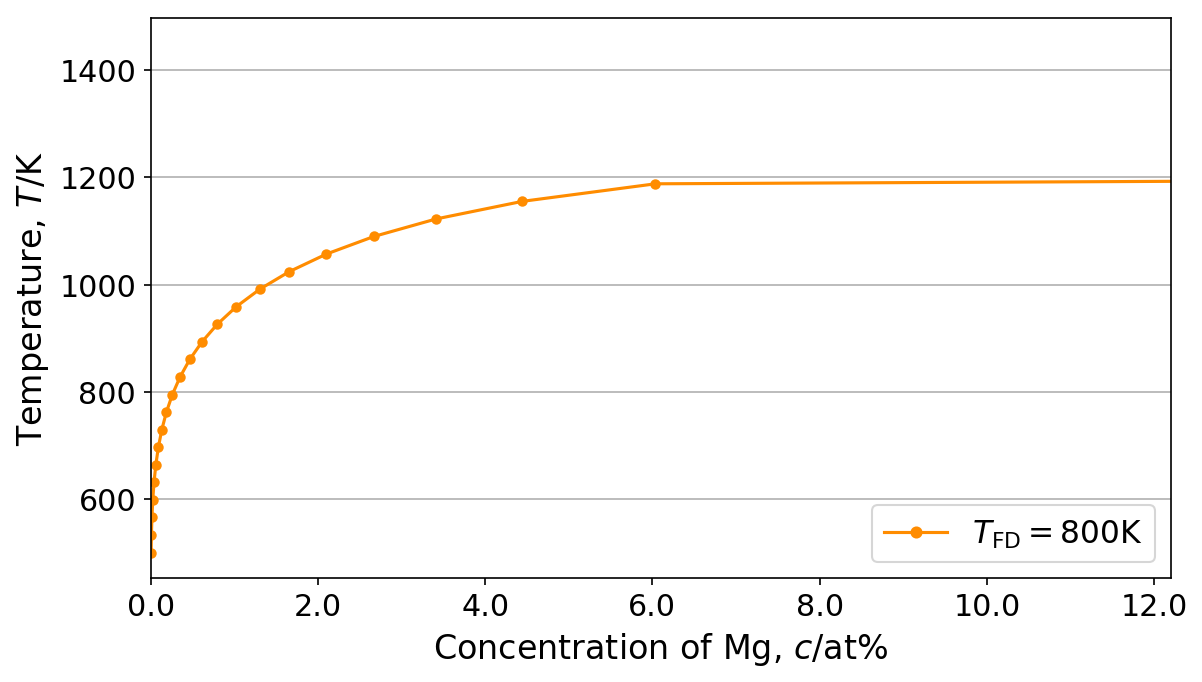

In [39]:
process(tmp.meta, dict(temp=temp, c=con, label='$T_\\mathrm{FD}=800$K'))

* T=900.0 Concentration=0.1322374574878373 Counts=214